# Tâche 5

Etudier l’effet de 3 éléments de symétrie différents (pas l’identité) chacun pour 1 atome différent.

In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from jupyter_jsmol.pymatgen import quick_view
from plotly.subplots import make_subplots
from pymatgen.io.cif import CifWriter
import plotly.graph_objects as go
from IPython.display import Image

In [2]:
mp_key = "xaEW7gxeGjtHSTeJuWSz9Uf8JpzNlgtg"
mp_id = "mp-9382"

In [3]:
with MPRester(mp_key) as m:
    structure = m.get_structure_by_material_id(mp_id)
struct = SpacegroupAnalyzer(structure)
conv_struc = SpacegroupAnalyzer(structure).get_conventional_standard_structure()
symmops = SpacegroupAnalyzer(conv_struc).get_space_group_operations()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Opération de symétrie 1

In [4]:
i_atom = 6 #7
i_symmop = 10 #2

In [5]:
symmop = symmops[i_symmop - 1]
print(symmop)

Rot:
[[-1.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.]


In [6]:
pos_init = conv_struc.sites[i_atom -1].frac_coords
print(pos_init)

[1.  1.  0.5]


In [7]:
pos_final = symmop.operate(pos_init)
print(pos_final)

[1.11022302e-16 1.00000000e+00 5.00000000e-01]


La matrice de rotation correspond à un opérateur d'inversion ( opération de deuxième espèce). Chaque coordonnée (x, y, z) est transformée en (-x, -y, -z). Le vecteur de translation tau est nul ce qui signifie qu'il n'y a pas de translation supplémentaire.

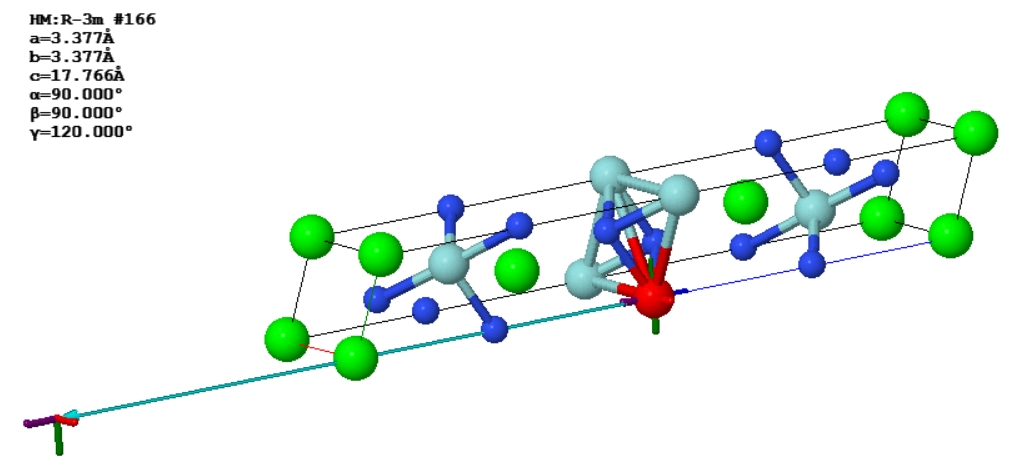

In [8]:
display(Image(filename="Op1.png"))

# Opération de symétrie 2

In [9]:
i_atom = 2
i_symmop = 7

In [10]:
symmop = symmops[i_symmop - 1]
print(symmop)

Rot:
[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]


In [11]:
pos_init = conv_struc.sites[i_atom -1].frac_coords
print(pos_init)

[0.66666667 0.33333333 0.33333333]


In [12]:
pos_final = symmop.operate(pos_init)
print(pos_final)

[ 0.33333333  0.66666667 -0.33333333]


La matrice de rotation correspond à une rotation d'ordre 4 autour de l'axe z, suivie d'une réflexion par rapport au plan xy. Chaque coordonnée (x,y,z) devient (y, x, -z). Le vecteur de translation tau est nul ce qui signifie qu'il n'y a pas de translation supplémentaire. Sur la figure nous pouvons observer le plan miroir suivant lequel la réflexion s'effectue.

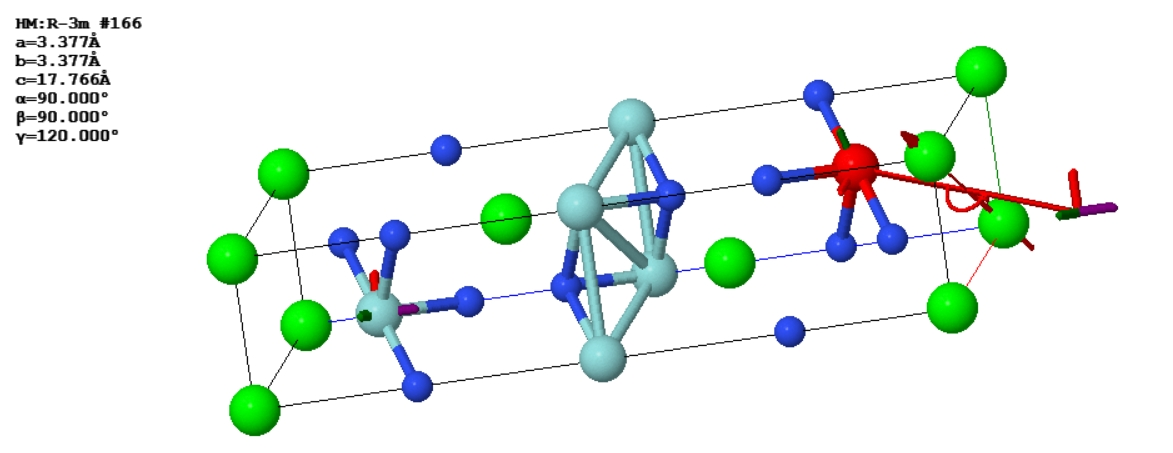

In [13]:
display(Image(filename="Op2.png"))

# Opération de symétrie 3

In [14]:
i_atom = 6
i_symmop = 10

In [15]:
symmop = symmops[i_symmop - 1]
print(symmop)

Rot:
[[-1.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.]


In [16]:
pos_init = conv_struc.sites[i_atom -1].frac_coords
print(pos_init)

[1.  1.  0.5]


In [17]:
pos_final = symmop.operate(pos_init)
print(pos_final)

[1.11022302e-16 1.00000000e+00 5.00000000e-01]


En analysant la matrice de rotation, nous observons que les coordonnées y et z restent inchangées, alors que la coordonnée x est transformée en une combinaison linéaire de x et y, selon la relation  x'= −𝑥 + 𝑦 . Cette transformation indique une réflexion suivie d'une translation dans le plan xy. Le vecteur translation tau est nul, cela signifie qu’aucune translation globale n’est appliquée après la rotation. Sur la figure nous pouvons observer le plan miroir suivant lequel la réflexion s'effectue.

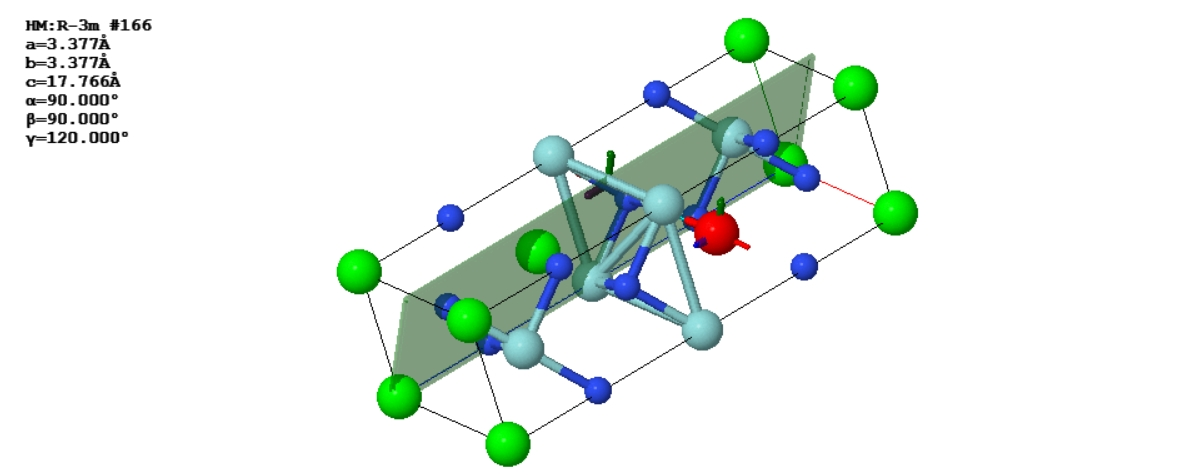

In [18]:
display(Image(filename="Op3.png"))